<a href="https://colab.research.google.com/github/Antonio-Villarreal/DeepLearningModels/blob/main/DNN_MNIST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks

## Import packages

In [64]:
from keras.datasets import mnist
from keras_preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [65]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Training Data

In [66]:
print(X_train.shape)
# 60,000 images, 20 pixels x 28 pixels

(60000, 28, 28)


In [67]:
print(y_train.shape)
#  60,000 classifications

(60000,)


### Testing Data

In [68]:
print(X_test.shape)
# 10,000 images, 28 pixels x 28 pixels

(10000, 28, 28)


In [69]:
print(y_test.shape)
# 10,000 classifications

(10000,)


## Understanding the image data format

In [70]:
X_train[0].shape
# 28 pixels x 28 pixels for image 1 of the training set

(28, 28)

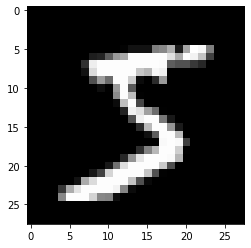

In [71]:
plt.imshow(X_train[0], cmap='gray')
# shows image 1 of the training set

In [72]:
y_train[0]
# shows the image 1 classification

5

## Preprocessing the image data

In [73]:
image_height, image_width = 28,28
# variables with 28 to represent 28 pixels for image dimensions

In [74]:
# RESHAPING TRAINING DATA
X_train = X_train.reshape(60000, image_height*image_width)
# reshapes each image from 28 pixels x 28 pixels to 784 pixels x 1 pixel
# COMPRESSING EACH IMAGE INTO SINGLE LINE
print(X_train.shape)
# verifies each of ther 60,000 images are one line of 784 pixels

(60000, 784)


In [75]:
# RESHAPING TRAINING DATA
X_test = X_test.reshape(10000, image_height*image_width)
# reshapes each image from 28 pixels x 28 pixels to 784 pixels x 1 pixel
# COMPRESSING EACH IMAGE INTO SINGLE LINE
print(X_test.shape)

(10000, 784)


In [76]:
print(X_train[0])
# prints matrix representation of each pixel in image 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# converts to floats to avoid division problems

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [77]:
X_train /= 255.0
X_test /= 255.0
# normalizes each pixel by dividing by its max value of 255 to make each value between 0-1
print(X_train[0])
# prints matrix representation of each pixel in image 1 showing normalized values

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [78]:
print(y_train.shape)
print(y_test.shape)
# 1 dimensional array

(60000,)
(10000,)


In [79]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# adding 10 bins for the 10 possible image classifications
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

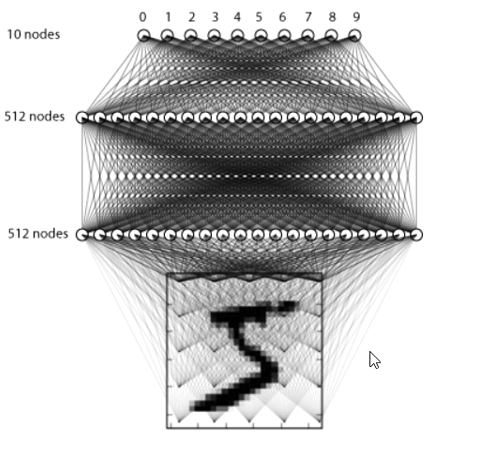

In [80]:
model = Sequential()

In [81]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
# Input Layer of 784 nodes -> Hidden Layer 1 of 512 nodes
model.add(Dense(512, activation='relu'))
# Next to Hidden Layer 2 of 512 Nodes
model.add(Dense(10, activation='softmax'))
# Next to Output Layer of 10 nodes (classifications)

# Dense = fully connected node

## Compile the model

In [82]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# optimizer = adam

# loss function = categorical_crossentropy
## output is 10 classes which is allowed by this loss function

# metrics = accuracy

In [83]:
model.summary()
# enables us to check model design

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [84]:
784*512+512
# = num of input nodes * num of output nodes + bias
# num of Parameters for Input Layer to Hidden Layer 1

401920

In [85]:
512*512+512
# = num of input nodes * num of output nodes + bias
# num of Parameters for Hidden Layer 1 to Hidden Layer 2

262656

In [86]:
512*10+10
# = num of input nodes * num of output nodes + bias
# num of Parameters for Hidden Layer 2 to Output Layer

5130

## Train the model

In [87]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1843 - accuracy: 0.9438 - val_loss: 0.1127 - val_accuracy: 0.9664
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0807 - accuracy: 0.9747 - val_loss: 0.0771 - val_accuracy: 0.9745
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0795 - val_accuracy: 0.9771
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0842 - val_accuracy: 0.9770
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.1110 - val_accuracy: 0.9727
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0930 - val_accuracy: 0.9775
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0909 - val_ac

## What is the accuracy of the model?

### Plot the accuracy of the training model

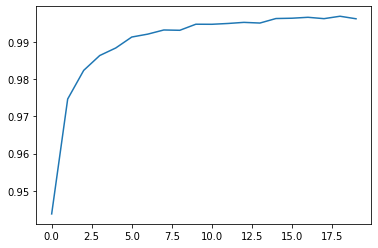

In [90]:
plt.plot(history.history['accuracy'])

### Plot the accuracy of training and validation set

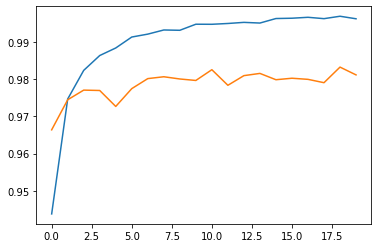

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Accuracy of training and validation with loss

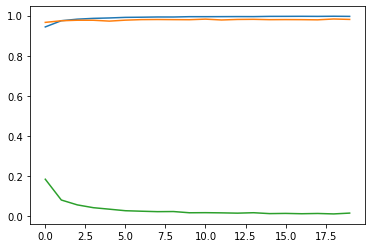

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

## Evaluating the model

In [98]:
score = model.evaluate(X_test, y_test)
score
# accuracy is around 98.11% for the model

313/313 [==============================] - 1s 3ms/step - loss: 0.1333 - accuracy: 0.9812


[0.13333487510681152, 0.9811999797821045]

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries